In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Intialization Values
 - Grid size
 - Goal
 - Starting Point
 - obstacles 


In [2]:
size = np.array([8, 8])         # 8 rows 8 columns

# goal has to be within the grid
goal = np.array([5, 6])         # goal state

init = np.array([1, 1])         # initial state

# Obstacles
obstacles = np.array([[2, 2], [3, 1], [1, 4], [3, 3], [2, 5], [6, 4],
                      [5, 5], [6, 3], [6, 2], [5, 2]])

"""
obstacles = np.array([[3, 3], [2, 3], [4, 3], [6, 3], [7, 3], [5, 3],
                      [1, 6], [1, 5], [2, 5], [3, 5], [4, 5],
                      [5, 5], [6, 5], [7, 5]])
"""

'\nobstacles = np.array([[3, 3], [2, 3], [4, 3], [6, 3], [7, 3], [5, 3],\n                      [1, 6], [1, 5], [2, 5], [3, 5], [4, 5],\n                      [5, 5], [6, 5], [7, 5]])\n'

### Q-Learning

### Improved Q-Learning
 - Discount factor $\gamma$

In [3]:
def manhattan_distance(x, y):
    return np.abs(x[0] - y[0]) + np.abs(x[1] - y[1])

In [4]:
def get_neighbors(state, size, obstacles):
    neighbors = []
    if state[0] > 0:
        neighbors.append([state[0] - 1, state[1]])
    if state[0] < size[0] - 1:
        neighbors.append([state[0] + 1, state[1]])
    if state[1] > 0:
        neighbors.append([state[0], state[1] - 1])
    if state[1] < size[1] - 1:
        neighbors.append([state[0], state[1] + 1])

    # if the neighbor is an obstacle, remove it from the list
    neighbors_copy = neighbors.copy()
    for neighbor in neighbors_copy:
        if (obstacles == neighbor).all(axis=1).any():
            neighbors.remove(neighbor)
            
    return neighbors

In [5]:
def check_complete(l, obstacles):
    flag = True
    for i in range(l.shape[0]):
        for j in range(l.shape[1]):
            if (obstacles == np.array([i, j])).all(axis=1).any():
                continue
            if l[i, j] == 0:
                flag = False
                return flag

    return flag


In [6]:
# matrix containing L and Q values for each state
l = np.zeros(size)
q = np.zeros(size)

l [goal[0], goal[1]] = 1    # Lock variable matrix
q [goal[0], goal[1]] = 100  # Reward matrix
  
discount_factor = 0.5       # Discount factor

print(get_neighbors(np.array([4 ,5]), size, obstacles))

while (True):
    neighbours = get_neighbors(init, size, obstacles)
    if check_complete(l, obstacles):
        break
    
    break


[[3, 5], [4, 4], [4, 6]]


### Visualize Q table 

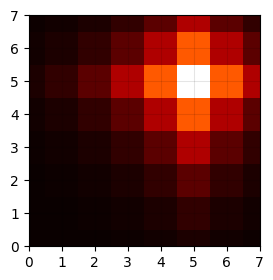

In [7]:
data = [
    [0.09765625, 0.1953125, 0.390625, 0.78125, 1.5625, 3.125, 1.5625, 0.78125],
    [0.1953125, 0.390625, 0.78125, 1.5625, 3.125, 6.25, 3.125, 1.5625],
    [0.390625, 0.78125, 1.5625, 3.125, 6.25, 12.5, 6.25, 3.125],
    [0.78125, 1.5625, 3.125, 6.25, 12.5, 25, 12.5, 6.25],
    [1.5625, 3.125, 6.25, 12.5, 25, 50, 25, 12.5],
    [3.125, 6.25, 12.5, 25, 50, 100, 50, 25],
    [1.5625, 3.125, 6.25, 12.5, 25, 50, 25, 12.5],
    [0.78125, 1.5625, 3.125, 6.25, 12.5, 25, 12.5, 6.25]
]

arr = np.array(data)
fig = plt.figure(figsize=(3, 3))
plt.imshow(arr, cmap='hot', interpolation='nearest')
plt.xlim(0, size[1] - 1)
plt.ylim(0, size[0] - 1)
plt.xticks(np.arange(0, size[1], 1))
plt.yticks(np.arange(0, size[0], 1))
plt.grid(which='major', axis='both', linestyle='-', color='k', alpha=0.1)

### Plot

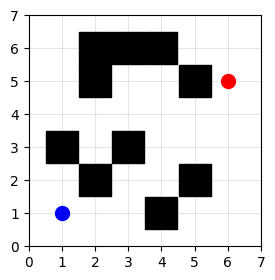

In [8]:
fig = plt.figure(figsize=(3, 3))

plt.scatter(goal[1], goal[0], c='r', s=100)
plt.scatter(init[1], init[0], c='b', s=100)
plt.scatter(obstacles[:, 1], obstacles[:, 0], c='k', marker='s', s=499)
plt.xlim(0, size[1] - 1)
plt.ylim(0, size[0] - 1)
plt.xticks(np.arange(0, size[1], 1))
plt.yticks(np.arange(0, size[0], 1))
plt.grid(which='major', axis='both', linestyle='-', color='k', alpha=0.1)
#plt.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
